In [49]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn2
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

## Transformations

### Functions And Transformations

::::{card} Function

$f(x) = x^2$

The function `f` is a mapping from x -> $x^2$

::::

::::{card} Transformations as a function of Vectors

$f\bigg(\begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix}\bigg) = \begin{bmatrix} y_1 \\ y_2 \end{bmatrix}$

The function `f` is a mapping from $\mathbb{R^3} \implies \mathbb{R^2}$ and can be called a `Vector Transformation`

:::{card} Example

Let a transformation $T: R^3 \implies R^2$ be given by $f\bigg(\begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix}\bigg) = \begin{bmatrix} x_1 + x_2 \\ x_2 + x_3 \end{bmatrix}$

| A (Domain) | B (Codomain) |
| ---------- | ------------ |
| \begin{bmatrix} 0 \\ 0 \\ 0 \end{bmatrix} | \begin{bmatrix} 0 \\ 0 \end{bmatrix} |
| \begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix} | \begin{bmatrix} 2 \\ 2 \end{bmatrix} |
| \begin{bmatrix} 1 \\ 0 \\ 1 \end{bmatrix} | \begin{bmatrix} 1 \\ 1 \end{bmatrix} |
| \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} | \begin{bmatrix} 3 \\ 5 \end{bmatrix} |

:::{note}

`A` and `B` are subspaces in $R^3, R^2$ respectively. T is a transformation function

:::

:::

::::

### Transformation Matrices

::::{card} 

Transformations can be performed using matrices. These transformations result in scaling, rotation of original vectors but they retain the relationship between a set of vectors. 

Given a `T` transformation Matrix, and an original vector $\hat{V}$

The transformation is given by $T\hat{V}$

::::

::::{card} Example - Cube

`Given` - A Cube in $R^3$

`Scale Transformation Matrix` - $\begin{bmatrix} 2 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}$

:::{card} Mathmatical illustration for a vector

Using the above Transformation function on $\hat{V} = \begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix}$

We get $T\hat{V} = \begin{bmatrix} 2 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}\begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix} = \begin{bmatrix} 2 \\ 1 \\ 1 \end{bmatrix}$
:::


The Transformation will result in scaling 2x length along `x` axis

---- 

`Rotation Transformation Matrix` - $\begin{bmatrix} \cos{\theta} & \sin{\theta} & 0 \\ \cos{\theta} & -\sin{\theta} & 0 \\ 0 & 0 & 1 \end{bmatrix} \: where \: \theta = 45$ degrees 

This will rotate the cube by $45$ degrees along x and y axis.

----

`Sheared Transformation Matrix` - $\begin{bmatrix} 1 & 2 & 0 \\ 1 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}$

::::


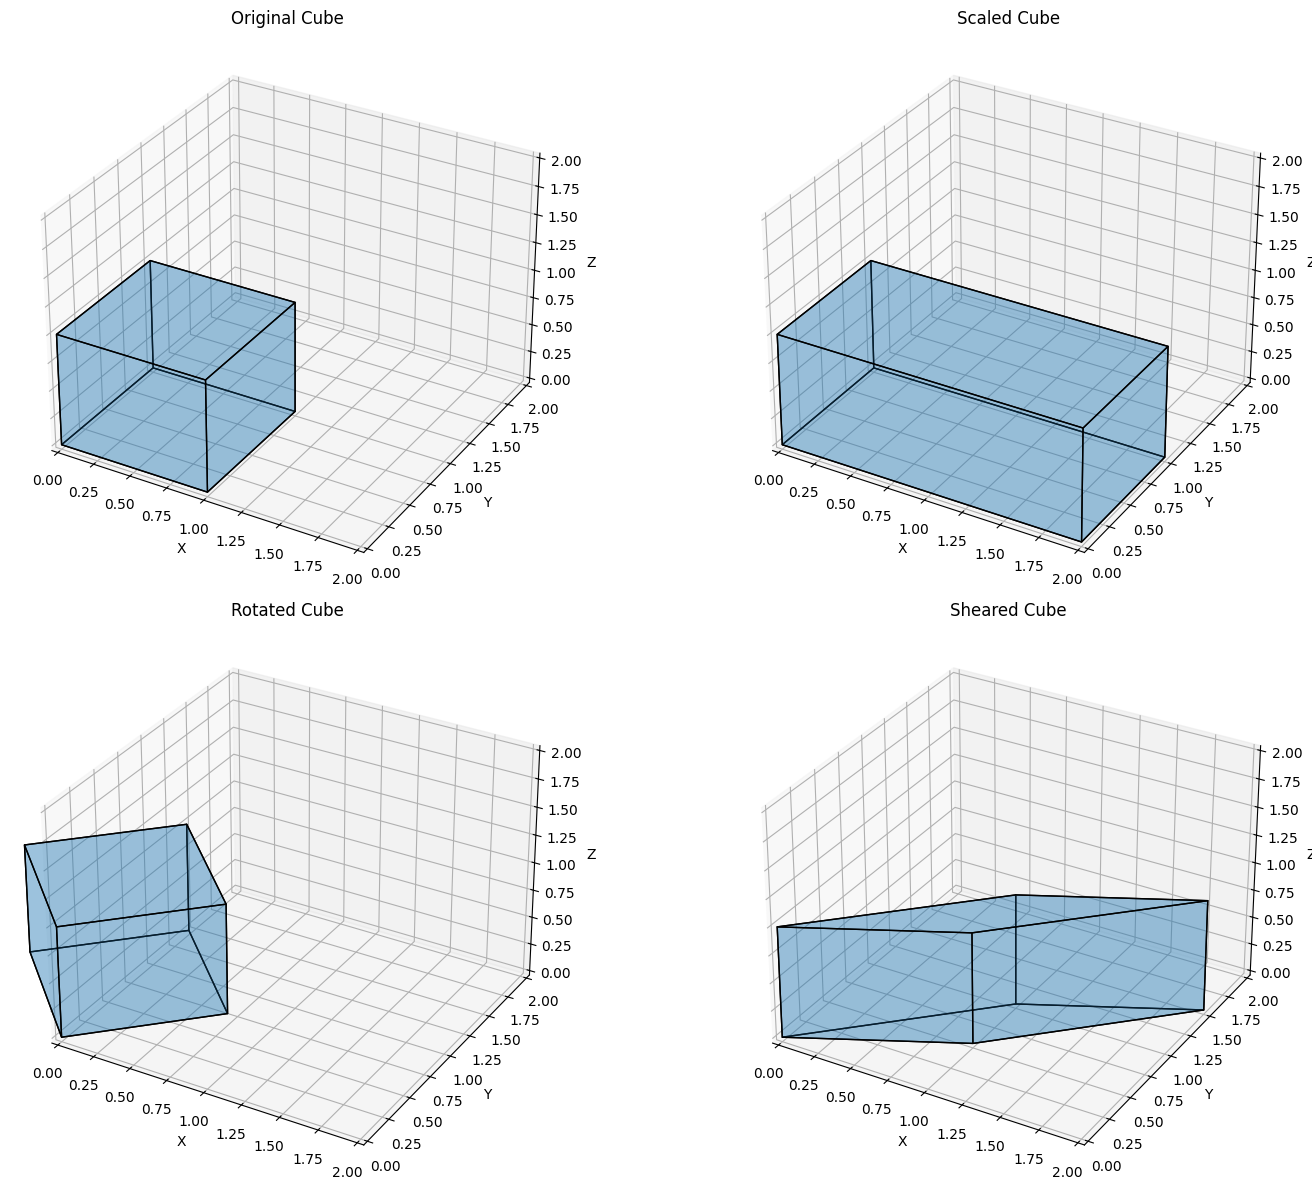

In [48]:
# Define the vertices of a unit cube
vertices = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1]
])

# Define the 12 triangles composing the cube's 6 faces
def get_faces(vertices):
    return [
        [vertices[0], vertices[1], vertices[2], vertices[3]],  # bottom
        [vertices[4], vertices[5], vertices[6], vertices[7]],  # top
        [vertices[0], vertices[1], vertices[5], vertices[4]],  # front
        [vertices[2], vertices[3], vertices[7], vertices[6]],  # back
        [vertices[0], vertices[3], vertices[7], vertices[4]],  # left
        [vertices[1], vertices[2], vertices[6], vertices[5]]   # right
    ]

# Define transformation matrices
def scaling_matrix(sx, sy, sz):
    return np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, sz]
    ])

def rotation_matrix_z(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta),  np.cos(theta), 0],
        [0,             0,            1]
    ])

def shear_matrix(shx, shy):
    return np.array([
        [1, shx, 0],
        [shy, 1, 0],
        [0, 0, 1]
    ])

# Apply transformations
scale_matrix = scaling_matrix(2, 1, 1)  # Example: scale x by 2
rotation_matrix = rotation_matrix_z(np.pi / 4)  # Example: rotate 45 degrees around z
shear_matrix = shear_matrix(1, 0.5)  # Example: shear x by 1 and y by 0.5

scaled_vertices = vertices @ scale_matrix.T
rotated_vertices = vertices @ rotation_matrix.T
sheared_vertices = vertices @ shear_matrix.T

# Plot function for a single plot
def plot_cube(ax, vertices, faces, title):
    # Plot the faces
    poly3d = Poly3DCollection(faces, alpha=.25, linewidths=1, edgecolors='k')
    ax.add_collection3d(poly3d)
    
    # Set plot limits
    ax.set_xlim([0, 2])
    ax.set_ylim([0, 2])
    ax.set_zlim([0, 2])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    
# Create a 2x2 grid of plots
fig = plt.figure(figsize=(16, 12))

# Original cube plot
ax1 = fig.add_subplot(221, projection='3d')
plot_cube(ax1, vertices, get_faces(vertices), 'Original Cube')

# Scaled cube plot
ax2 = fig.add_subplot(222, projection='3d')
plot_cube(ax2, scaled_vertices, get_faces(scaled_vertices), 'Scaled Cube')

# Rotated cube plot
ax3 = fig.add_subplot(223, projection='3d')
plot_cube(ax3, rotated_vertices, get_faces(rotated_vertices), 'Rotated Cube')

# Sheared cube plot
ax4 = fig.add_subplot(224, projection='3d')
plot_cube(ax4, sheared_vertices, get_faces(sheared_vertices), 'Sheared Cube')

plt.tight_layout()
plt.show()
